In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
raw_data = pd.read_csv('uci-secom.csv')

In [2]:
raw_data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


## null값 median으로 변경

In [4]:
raw_data.replace(np.nan, raw_data.median(), inplace=True)

In [5]:
# again, checking if there is any NULL values left
raw_data.isnull().any().any()

False

## 같은 값만 있는 열 제거

In [7]:
unique_columns = []
for i in raw_data.columns:
    tmp = raw_data[i].unique() # data[i].unique()
    if len(tmp) == 1:
        unique_columns.append(i)

In [8]:
len(unique_columns)

116

In [9]:
raw_data.drop(unique_columns, axis='columns', inplace=True)

In [10]:
data = raw_data

## Time 변수 제거

In [12]:
data.drop('Time', axis='columns', inplace=True)

In [13]:
data

,0,1,2,3,4,6,7,8,9,10,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,72.2889,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046,71.9005,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,72.2889,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,-0.0057,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,-0.0093,...,72.2889,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,1.4616,-0.0013,0.0004,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,0.0032,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


## X, y 분리

In [15]:
X = data.loc[:,'0':'589'].copy() # 컬럼명으로 search 
y = data.loc[:,'Pass/Fail'].copy()

## Train, test split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

## 데이터 표준화

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 성능평가

accuracy score 0.9299363057324841
confusion_matrix [[290   3]
 [ 19   2]]
precision_score 0.09860479223536549
recall_score 0.09523809523809523
f1_score 0.15384615384615385


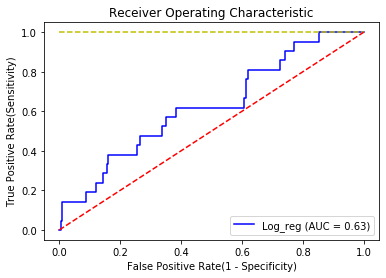

In [21]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=13,solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.metrics import accuracy_score

y_pred = log_reg.predict(X_test_scaled)
print('accuracy score', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix', cm)
print('precision_score', average_precision_score(y_test, y_pred))
print('recall_score', recall_score(y_test, y_pred))
print('f1_score',f1_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# decision_function: 불확실성을 추정 = 확률로 표현 
roc_auc  = roc_auc_score(y_test, log_reg.decision_function(X_test_scaled))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, log_reg.decision_function(X_test_scaled))

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Log_reg (AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

## columns to list 

In [23]:
feature_name = list(X.columns)
# no of maximum features we need to select
num_feats=300

## LGBMClassifier : SelectFromModel

In [25]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)

SelectFromModel(estimator=LGBMClassifier(colsample_bytree=0.2,
                                         learning_rate=0.05,
                                         min_child_weight=40,
                                         min_split_gain=0.01, n_estimators=500,
                                         num_leaves=32, reg_alpha=3,
                                         reg_lambda=1),
                max_features=300)

In [26]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

62 selected features


In [27]:
embeded_lgb_feature[:5]

['0', '10', '21', '22', '27']

# 선택된 feature의 성능 평가

## LGBMClassifier : SelectFromModel
- minmaxscaler

In [31]:
df_lgb = pd.DataFrame(X, columns=embeded_lgb_feature)

In [32]:
X_lgb = df_lgb.copy() 

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
random_state = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,0,1,3,5,7,9,10,11,13]
'''random_state =[]
for i in range(0,31):
  random_state.append(i)
#print(random_state, end = ' ')'''

for rand in random_state:
  X_train,X_test,y_train,y_test=train_test_split(X_lgb,y,test_size=0.2,random_state= rand )
  log_reg = LogisticRegression(random_state=13,solver='liblinear',C=10.0)
  scaler = MinMaxScaler(feature_range=(0,1))

  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
    
  log_reg.fit(X_train_scaled, y_train)
  pred_proba_1 = log_reg.predict_proba(X_test_scaled)[:,1]
  auc_test = roc_auc_score(y_test, pred_proba_1)
  print('random_state=', rand,'  ' ,'auc_test =', auc_test)
  print('')
print('mean auc_test=',np.mean(auc_test))

random_state= 0    auc_test = 0.6202402248913877

random_state= 1    auc_test = 0.8229591836734693

random_state= 2    auc_test = 0.8037414965986396

random_state= 3    auc_test = 0.7646743978590543

random_state= 4    auc_test = 0.7799145299145299

random_state= 5    auc_test = 0.7528735632183908

random_state= 6    auc_test = 0.8481292517006803

random_state= 7    auc_test = 0.7431638129312548

random_state= 8    auc_test = 0.7199712643678161

random_state= 9    auc_test = 0.8253401360544217

random_state= 10    auc_test = 0.7168860718348773

random_state= 11    auc_test = 0.6893768768768769

random_state= 12    auc_test = 0.8057432432432432

random_state= 13    auc_test = 0.742805523293328

random_state= 14    auc_test = 0.8051695801583745

random_state= 15    auc_test = 0.7011325503355704

random_state= 16    auc_test = 0.6751115075825156

random_state= 17    auc_test = 0.7392798446137756

random_state= 18    auc_test = 0.8004358655043587

random_state= 19    auc_test = 0.769144144

In [36]:
X_lgb.columns

Index(['0', '10', '21', '22', '27', '33', '48', '56', '59', '65', '68', '75',
       '82', '86', '90', '102', '103', '120', '122', '124', '125', '127',
       '129', '137', '160', '163', '175', '180', '195', '200', '239', '281',
       '287', '298', '299', '301', '302', '307', '312', '316', '319', '333',
       '336', '338', '341', '413', '431', '439', '446', '460', '469', '477',
       '485', '486', '488', '510', '511', '558', '575', '577', '582', '587'],
      dtype='object')

accuracy score 0.9267515923566879
confusion_matrix [[291   0]
 [ 23   0]]
precision_score 0.0732484076433121
recall_score 0.0
f1_score 0.0


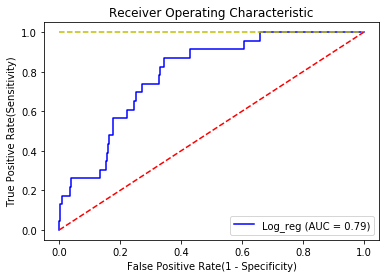

In [41]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=13,solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.metrics import accuracy_score

y_pred = log_reg.predict(X_test_scaled)
print('accuracy score', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix', cm)
print('precision_score', average_precision_score(y_test, y_pred))
print('recall_score', recall_score(y_test, y_pred))
print('f1_score',f1_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# decision_function: 불확실성을 추정 = 확률로 표현 
roc_auc  = roc_auc_score(y_test, log_reg.decision_function(X_test_scaled))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, log_reg.decision_function(X_test_scaled))

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Log_reg (AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

## 앙상블 학습 

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

# 보팅 적용을 위한 개별 모델은 로지스틱 회귀와 KNN입니다.
logistic_regression = LogisticRegression(random_state=13,solver='liblinear',C=10.0)
knn = KNeighborsClassifier(n_neighbors=7)

# 개별모델을 소프트보팅 기반의 앙상블 모델로 구현한 분류기
voting_model = VotingClassifier(estimators=[ ('LogisticRegression', logistic_regression), ('KNN', knn)], voting='hard')

# 데이터를 훈련셋과 테스트셋으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_lgb,y,test_size=0.2,random_state= 14 )

# minmaxscaler 
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 보팅 분류기의 학습/예측/평가
voting_model.fit(X_train_scaled, y_train)
pred = voting_model.predict(X_test_scaled)
print('보팅 분류기의 정확도: {0: .4f}'.format(roc_auc_score(y_test, pred_proba_1)))

# 개별 모델의 학습/예측/평가
classifiers = [logistic_regression, knn]
for classifier in classifiers:
    classifier.fit(X_train_scaled, y_train)
    pred = classifier.predict(X_test_scaled)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, roc_auc_score(y_test, pred_proba_1)))

보팅 분류기의 정확도:  0.4452
LogisticRegression 정확도: 0.4452
KNeighborsClassifier 정확도: 0.4452
